<a target="_blank" href="https://colab.research.google.com/github/trendinafrica/Comp_Neuro-ML_course/blob/main/notebooks/12-Monday/Python_colab.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

<img align="left" width="300" src="https://raw.githubusercontent.com/trendinafrica/TReND-CaMinA/main/images/CaMinA_logo.png">

# TReND-CaMinA Day 1: Linear Algebra - Data Handling and Visualization

**Content creators:** Artemis Koumoundourou & Burak Gür

**Acknowledgements:** This notebook includes modified parts/was inspired from:
  - previous TReND-CaMinA courses
  - Neuromatch Academy tutorials [W0D3 Linear Algebra](https://compneuro.neuromatch.io/tutorials/W0D3_LinearAlgebra/student/W0D3_Tutorial1.html) by **Ella Batty**

---
# **Introduction**
In this notebook we will put into practice the knowlede aquired in the previous sessions.

We will use different packages to import and display the data as well as perform some basic data analysis and calculations in linear algebra. The main point of this sessions is to practice your newly acquired skills.

The solution are provided in the notebook. In most cases there is not one single solution - so you might come up with a solution that works just as well as the one we came up with. That does not make either of our solutions wrong ;). There is simply different ways of solving problems.
If you get stuck and before you check the solution ask one of the TAs for help. They might be able to give you some new ideas.


Let's go!

# Exercise 1: Which two organizers are the most similar?
## Themes to cover
- Vector/matrix filling
- Norm
- Dot product

## Task
Using `numpy` and linear algebra figure out who of the following two people are the most similar in terms of their food preferences (keep in mind these preferences may not match with their real preference):

Food preferences ranging from 0 (hate it) to 10 (always think about it)=

| Food     | Joana | Artemis | Saray | Tom | Emmanuel |
|-----------|-------|-----|---------|---------|---------|
| Tacos    | 9     | 3   | 8       |7       |10       |
| Fish & Chips   | 0     | 0   | 0      |10       |3      |
| Beer   | 9     | 8   | 8       |7       |7       |
| Jallof (Nigerian)   | 10     | 8   | 9       |10       |6       |
| Jallof (Ghanaian)   | 8    | 7   | 10       |7       |10       |




## Bonus task (related):
Find out the similarity from amount of food eaten (gr or ml) in the last month. Be careful: Each person eats different amounts in total.

| Food (gr or ml)            | Joana | Artemis | Saray | Tom | Emmanuel |
|-----------------|-------|---------|-------|-----|----------|
| Tacos           | 450   | 180     | 320   | 525 | 650      |
| Fish & Chips    | 0     | 0       | 0     | 750 | 195      |
| Beer            | 450   | 480     | 320   | 525 | 455      |
| Jallof (Nigerian)| 500  | 480     | 360   | 750 | 390      |
| Jallof (Ghanaian)| 400  | 420     | 400   | 525 | 650      |

### Hints:
- Dot product also depends on the length of the vectors. We might need to get rid of that dependency in one of the above cases.




## Your turn
Write a python code for exercise 1 below:

In [2]:
import numpy as np

In [104]:
# Your code goes below

def normalise(x):
    return x/np.linalg.norm(x)

names = ['Joana', 'Artemis', 'Saray', 'Tom', 'Emmanuel']

preferences = np.array([
    [9,3,8,7,10],
    [0,0,0,10,3],
    [9,8,8,7,7],
    [10,8,9,10,6],
    [8,7,10,7,10],
]).T

# preferences = np.array([normalise(person) for person in preferences])
best = None
min = np.inf
for person in range(len(preferences)):
    for partner in range(person):
        diff = np.linalg.norm(person-partner)
        if diff < min: 
            best = [person, partner]

print("Using min Euclidean Distance:")
print([names[i] for i in best], '\n')

similarity = preferences@preferences.T * (1-np.eye(5))
best =  np.where(similarity == np.max(similarity))
print("Using max dot product:")
print([names[i] for i in best[0]])

Using min Euclidean Distance:
['Emmanuel', 'Tom'] 

Using max dot product:
['Joana', 'Saray']


In [ ]:
#@title Click to see solution (using vectors) {display-mode: "form" }
import numpy as np

# Define preferences
joana_preferences = np.array([9, 0, 9, 10, 8])
artemis_preferences = np.array([3, 0, 8, 8, 7])
saray_preferences = np.array([8, 0, 8, 9, 10])
tom_preferences = np.array([7, 10, 7, 10, 7])
emmanuel_preferences = np.array([10, 3, 7, 6, 10])

# Names of the people
names = ["Joana", "Artemis", "Saray", "Tom", "Emmanuel"]

# Preferences list
preferences = [joana_preferences, artemis_preferences, saray_preferences, tom_preferences, emmanuel_preferences]
# Normalize the preference vectors
norms = np.linalg.norm(preferences, axis=1)
normalized_preferences = preferences / norms[:, np.newaxis]

# Calculate the dot products
dot_products = {}
for i in range(len(preferences)):
    for j in range(i + 1, len(preferences)):
        dot_product = np.dot(preferences[i], preferences[j])
        dot_products[(names[i], names[j])] = dot_product

# Print the results
for pair, value in dot_products.items():
    print(f"Dot Product ({pair[0]} ⋅ {pair[1]}): {value}")

# Find the two people with the most similar preferences
most_similar_pair = max(dot_products, key=dot_products.get)
most_similar_value = dot_products[most_similar_pair]

print(f"\nThe two people with the most similar preferences are {most_similar_pair[0]} and {most_similar_pair[1]} with a dot product of {most_similar_value}.")



In [ ]:
#@title Click to see solution (using matrix dot product) {display-mode: "form" }

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define preferences
preferences = np.array([
    [9, 0, 9, 10, 8],  # Joana
    [3, 0, 8, 8, 7],   # Artemis
    [8, 0, 8, 9, 10],  # Saray
    [7, 10, 7, 10, 7], # Tom
    [10, 3, 7, 6, 10]  # Emmanuel
])

names = ["Joana", "Artemis", "Saray", "Tom", "Emmanuel"]

# Calculate the dot product matrix
dot_product_matrix = np.dot(preferences, preferences.T)


# Restore the diagonal values for better visualization
np.fill_diagonal(dot_product_matrix, 0)

# Plot the dot product matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dot_product_matrix, annot=True, fmt=".4f", cmap="coolwarm", xticklabels=names, yticklabels=names, cbar=True)
plt.title("Dot Product Matrix of Preferences")
plt.show()


In [ ]:
#@title Click to see solution of Bonus question {display-mode: "form" }

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preferences
preferences = np.array([
    [450, 0, 450, 500, 400],   # Joana (scale factor 1.0)
    [180, 0, 480, 480, 420],   # Artemis (scale factor 1.2)
    [320, 0, 320, 360, 400],   # Saray (scale factor 0.8)
    [525, 750, 525, 750, 525], # Tom (scale factor 1.5)
    [650, 195, 455, 390, 650]  # Emmanuel (scale factor 1.3)
])

# Scale the preferences
scaled_preferences = preferences * scaling_factors[:, np.newaxis]

# Names of the people
names = ["Joana", "Artemis", "Saray", "Tom", "Emmanuel"]

# Normalize the preference vectors
norms = np.linalg.norm(scaled_preferences, axis=1)
normalized_preferences = scaled_preferences / norms[:, np.newaxis]

# Calculate the cosine similarity matrix
cosine_similarity_matrix = np.dot(normalized_preferences, normalized_preferences.T)

# To avoid self-pairing, set the diagonal to 0
np.fill_diagonal(cosine_similarity_matrix, 0)

# Find the indices of the maximum value in the cosine similarity matrix
max_index = np.unravel_index(np.argmax(cosine_similarity_matrix), cosine_similarity_matrix.shape)

# Extract the names of the most similar pair
most_similar_pair = (names[max_index[0]], names[max_index[1]])
most_similar_value = cosine_similarity_matrix[max_index]

# Print the most similar pair
print(f"\nThe two people with the most similar preferences are {most_similar_pair[0]} and {most_similar_pair[1]} with a cosine similarity of {most_similar_value}.")

# Restore the diagonal values for better visualization
np.fill_diagonal(cosine_similarity_matrix, 1)

# Plot the cosine similarity matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_similarity_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=names, yticklabels=names, cbar=True)
plt.title("Cosine Similarity Matrix of Preferences")
plt.show()


## Discuss: Why are the two people you found most similar to each other?

---
# Excercise 2: In which position does each place cell fire?

The dataset `place_cells.csv` was collected from an (artificial) animal moving around a 1 $m^2$ environment. 10 “place cells” — cell types commonly found in the hippocampus which only fire at specific locations in an environment — spike as the animal moves around. The columns in the data give timestamps (column name "times") and positions ("pos_x" and "pos_y") as well as True or False values for whether a place cell emitted a spike at a given timestamp ("spikes_0","spikes_1", … , "spikes_9").<br><br>


###Task:
Visualise the positions in which each place cell fired within the animal's trajectory.<br><br>


###Hints:
- Create a figure with ten subplots (one for each cell).
- Isolated the x and y positions of the animal and plot them in each subplot.
- Use the spike data to scatter the positions where a cell fired (one cell per subplot).

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\gabri\AppData\Local\Temp\ipykernel_24656\1676671814.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


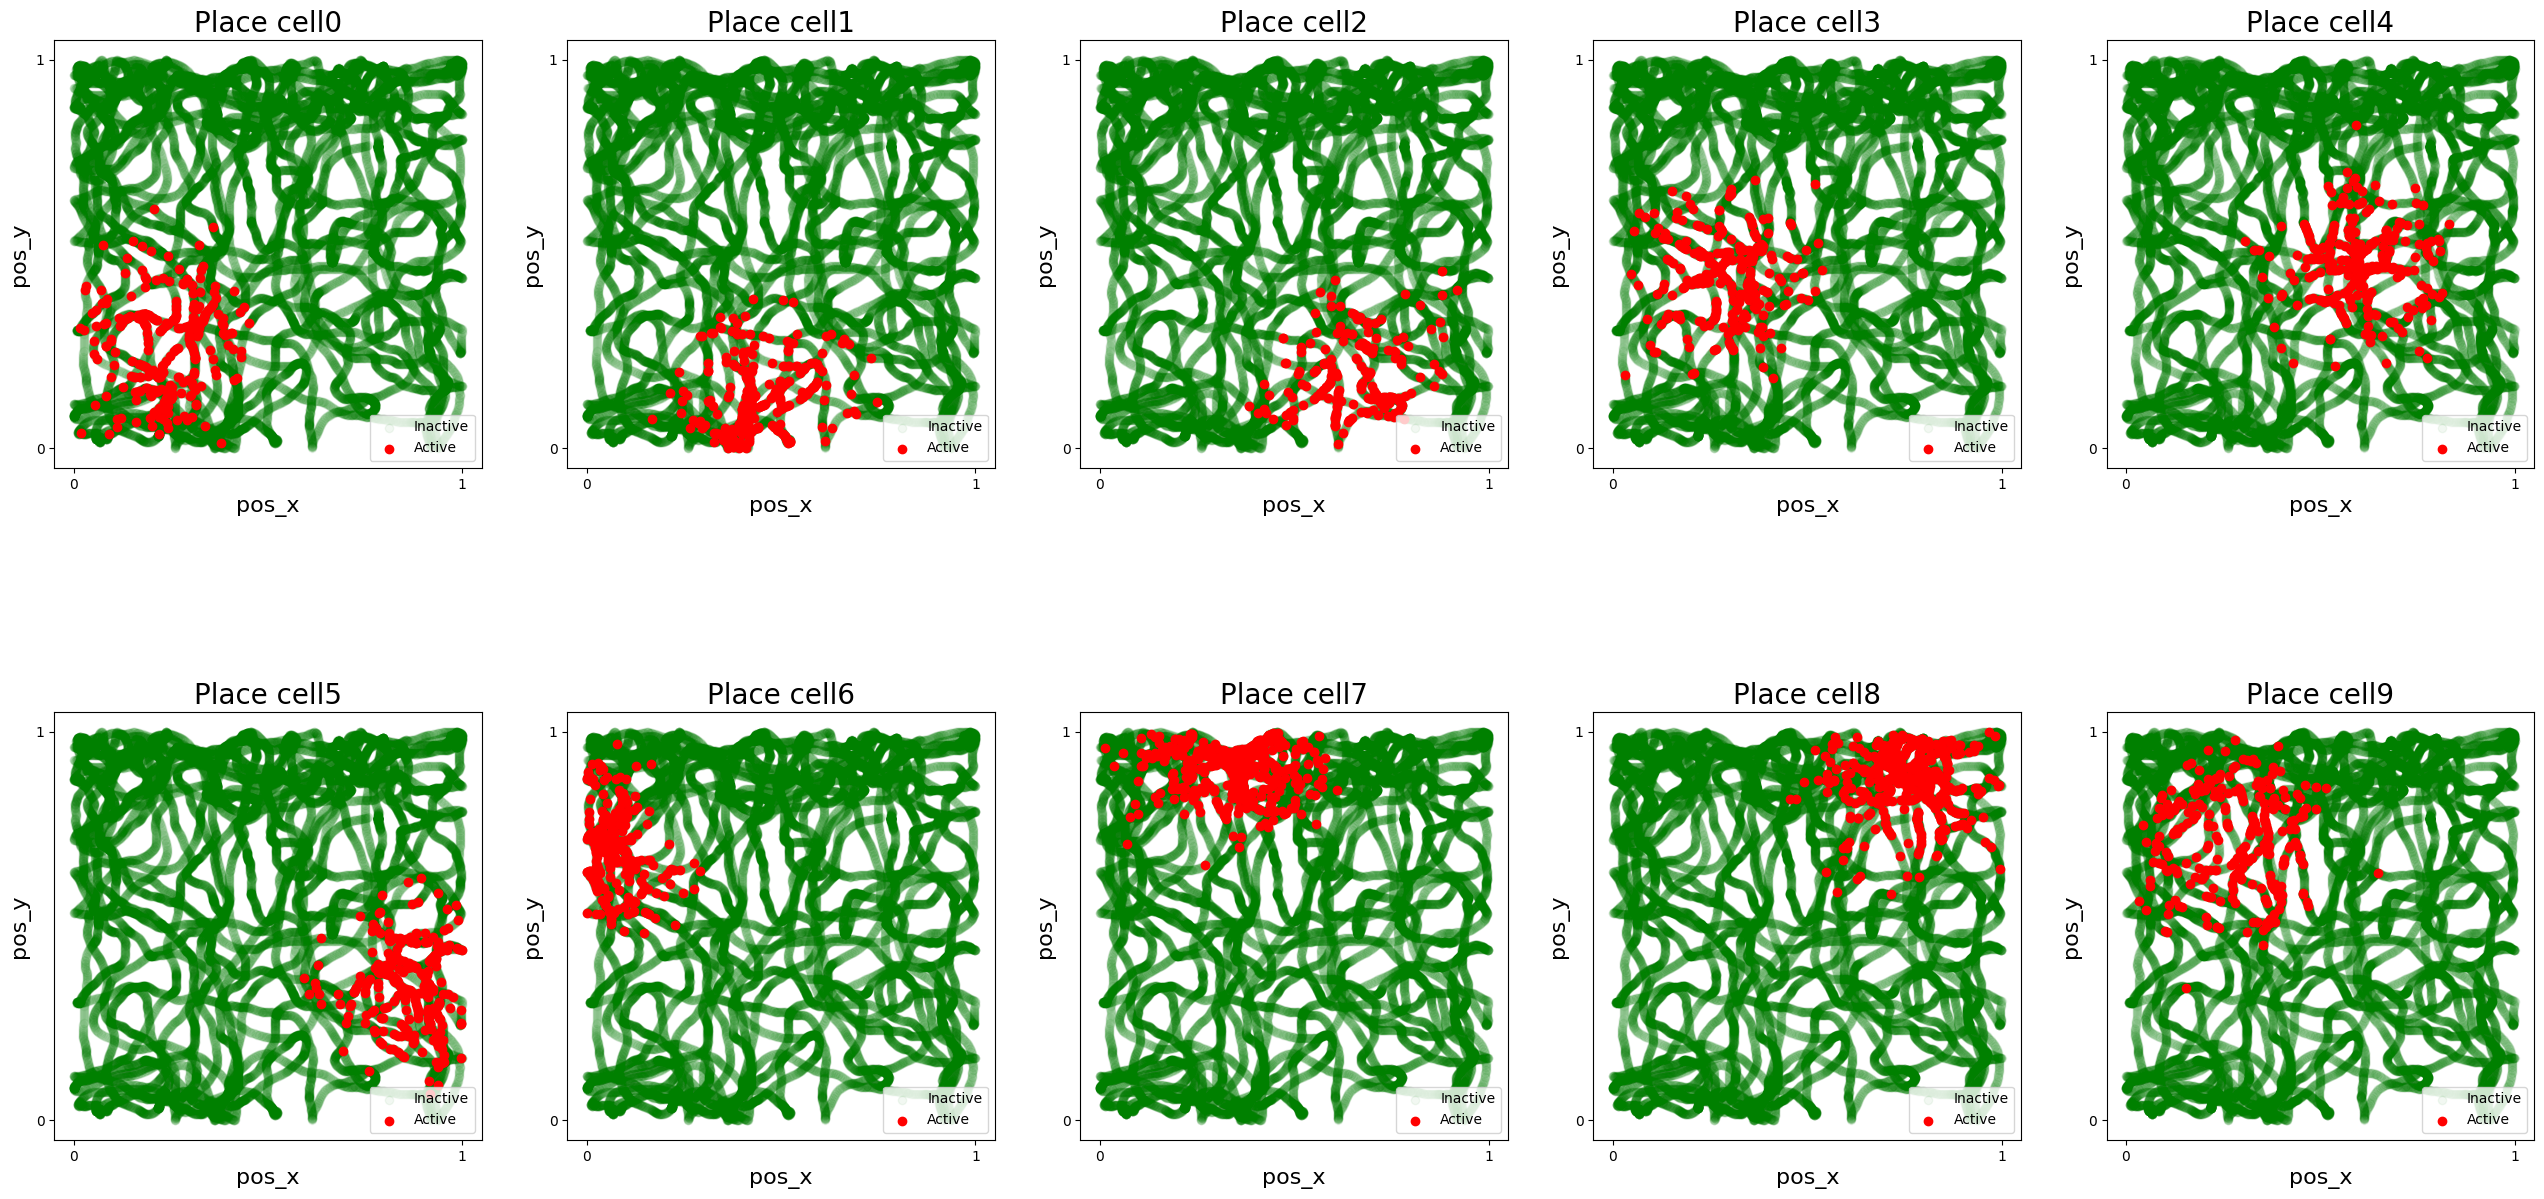

In [100]:
#Import the packages you will need
df = pd.read_csv("Data/place_cells.csv")
df = df.replace({True: 1, False: 0})

fig= plt.figure(figsize=(32,16))

for i in range(10):

    active = df.loc[df['spikes_'+ str(i)] == 1]

    inactive = df.loc[df['spikes_'+ str(i)] == 0]

    x_active = active['pos_x'].to_numpy()
    y_active = active['pos_y'].to_numpy()
    x_inactive = inactive['pos_x'].to_numpy()
    y_inactive = inactive['pos_y'].to_numpy()


    ax=fig.add_subplot(2, 5, i+1)

    ax.scatter(x_inactive, y_inactive, label='Inactive', color='green', alpha=0.05)
    ax.scatter(x_active, y_active, label='Active',color='red')
    ax.legend()
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    xlabel=ax.set_xlabel("pos_x",fontsize=16)
    xlabel=ax.set_ylabel("pos_y",fontsize=16)
    title=ax.set_title("Place cell "+str(i),fontsize=20)
    ax.set_aspect('equal')


In [ ]:
#Import file


In [ ]:
#Load data and visualize them

In [ ]:
#@title Click to see solution
#Import the packages you will need
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#@title Click to see solution
from google.colab import files
uploaded = files.upload() #open the dataCon_noheader.csv file

In [ ]:
#@title Click to see solution
data = pd.read_csv('place_cells.csv')
data

In [ ]:
#extract positions and spikes


In [ ]:
#@title Click to see solution
x = data['pos_x']
y = data['pos_y']

id_spikes_0 = (data['spikes_0'].values == True)
id_spikes_1 = (data['spikes_1'].values == True)
id_spikes_2 = (data['spikes_2'].values == True)
id_spikes_3 = (data['spikes_3'].values == True)
id_spikes_4 = (data['spikes_4'].values == True)
id_spikes_5 = (data['spikes_5'].values == True)
id_spikes_6 = (data['spikes_6'].values == True)
id_spikes_7 = (data['spikes_7'].values == True)
id_spikes_8 = (data['spikes_8'].values == True)
id_spikes_9 = (data['spikes_9'].values == True)

In [ ]:
#create a figure with 10 subplots


#make a plot with the trajectory and a red dot for each spike for each cell


# Hide x labels and tick labels for top plots and y ticks for right plots.



In [ ]:
#@title Click to see solution
#create a figure with 10 subplots
fig, axs = plt.subplots(2,5, figsize=(20,8))

#make a plot with the trajectory and a red dot for each spike for each cell
ax0=axs[0,0]
ax0.scatter(x,y,s=1,alpha=0.2)
ax0.set_xlim([0,1]); ax0.set_ylim([0,1])
ax0.scatter(x[id_spikes_0],y[id_spikes_0],s=10,color='red')
ax0.set_aspect('equal', adjustable="datalim")
ax0.set_title( 'Place cell 1')

ax1=axs[0,1]
ax1.scatter(x,y,s=1,alpha=0.2)
ax1.set_xlim([0,1]); ax1.set_ylim([0,1])
ax1.scatter(x[id_spikes_1],y[id_spikes_1],s=10,color='red')
ax1.set_aspect('equal', adjustable="datalim")
ax1.set_title( 'Place cell 2')

ax2=axs[0,2]
ax2.scatter(x,y,s=1,alpha=0.2)
ax2.set_xlim([0,1]); ax2.set_ylim([0,1])
ax2.scatter(x[id_spikes_2],y[id_spikes_2],s=10,color='red')
ax2.set_aspect('equal', adjustable="datalim")
ax2.set_title( 'Place cell 3')

ax3=axs[0,3]
ax3.scatter(x,y,s=1,alpha=0.2)
ax3.set_xlim([0,1]); ax3.set_ylim([0,1])
ax3.scatter(x[id_spikes_3],y[id_spikes_3],s=10,color='red')
ax3.set_aspect('equal', adjustable="datalim")
ax3.set_title( 'Place cell 4')

ax4=axs[0,4]
ax4.scatter(x,y,s=1,alpha=0.2)
ax4.set_xlim([0,1]); ax4.set_ylim([0,1])
ax4.scatter(x[id_spikes_4],y[id_spikes_4],s=10,color='red')
ax4.set_aspect('equal', adjustable="datalim")
ax4.set_title( 'Place cell 5')

ax5=axs[1,0]
ax5.scatter(x,y,s=1,alpha=0.2)
ax5.set_xlim([0,1]); ax5.set_ylim([0,1])
ax5.scatter(x[id_spikes_5],y[id_spikes_5],s=10,color='red')
ax5.set_aspect('equal', adjustable="datalim")
ax5.set_title( 'Place cell 6')

ax6=axs[1,1]
ax6.scatter(x,y,s=1,alpha=0.2)
ax6.set_xlim([0,1]); ax6.set_ylim([0,1])
ax6.scatter(x[id_spikes_2],y[id_spikes_2],s=10,color='red')
ax6.set_aspect('equal', adjustable="datalim")
ax6.set_title( 'Place cell 7')

ax7=axs[1,2]
ax7.scatter(x,y,s=1,alpha=0.2)
ax7.set_xlim([0,1]); ax7.set_ylim([0,1])
ax7.scatter(x[id_spikes_7],y[id_spikes_7],s=10,color='red')
ax7.set_aspect('equal', adjustable="datalim")
ax7.set_title( 'Place cell 8')

ax8=axs[1,3]
ax8.scatter(x,y,s=1,alpha=0.2)
ax8.set_xlim([0,1]); ax8.set_ylim([0,1])
ax8.scatter(x[id_spikes_8],y[id_spikes_8],s=10,color='red')
ax8.set_aspect('equal', adjustable="datalim")
ax8.set_title( 'Place cell 9')

ax9=axs[1,4]
ax9.scatter(x,y,s=1,alpha=0.2)
ax9.set_xlim([0,1]); ax9.set_ylim([0,1])
ax9.scatter(x[id_spikes_9],y[id_spikes_9],s=10,color='red')
ax9.set_aspect('equal', adjustable="datalim")
ax9.set_title( 'Place cell 10')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

---
# Excercise 3: Are there differences in the long-term potentiation of the two animal groups?

The dataset `LTP.csv` contains measurements collected from brain slices of 5 control and 5 mutant animals upon long-term potentiation (LTP) induction with a high frecuency stimulus (HFS).

The columns in the data give timestamps in mininutes (column name "Times") and the fEPSP slope (mV/s) -the rate of change in the amplitude of excitatory postsynaptic potentials recorded in neural tissue- for each animal at a given timestamp ("Con_1", "Con_2"...,"Mut_5"). HFS was applied at 0 min.<br><br>

###Task:
Plot the fEPSP slopes of the two groups and compare the two groups for potential changes in the LTP.<br><br>


###Hints:

- Calculate the baseline for each animal (average fEPSP slope before HFS application) and normalise the measurements.
- Calculate the average normalized measurement for each timestamp for each group
- Plot the fEPSP slopes for the two animal groups as % of the baseline.<br><br>


(LTP is believed to play a crucial role in learning and memory processes in the brain. It is defined as a persistent increase in synaptic strength that lasts for hours to days, and sometimes even longer, leading to changes in the efficiency of synaptic transmission.)

In [2]:
#Import the packages you will need
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Import file
data = np.loadtxt("Data/LTP.csv", delimiter=",",skiprows=1)
print(data)

[[ -10.333333  760.4       944.9      ...  762.9       489.2
   789.      ]
 [ -10.        836.6       778.7      ...  721.9       495.5
   918.1     ]
 [  -9.666667  793.2       777.       ...  885.7       477.6
   870.1     ]
 ...
 [  39.333294 1075.       1301.       ... 1116.        630.
   879.6     ]
 [  39.666627 1377.1      1353.1      ... 1175.4       609.6
  1045.5     ]
 [  39.99996  1086.6      1465.5      ...  918.6       615.6
  1072.2     ]]


In [ ]:
#Load data and visualize them


In [ ]:
#@title Click to see solution
#Import the packages you will need
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#@title Click to see solution
from google.colab import files
uploaded = files.upload() #open the dataCon_noheader.csv file

In [ ]:
#@title Click to see solution
#load data and visualize them
data = pd.read_csv('LTP.csv')
data

In [26]:
#Find the time values before the HFS application
mask = (data[:,0] < 0)
pre_HFS = data[mask,:] 

#Create the normalised data for each animal by dividing the values with the average of the values corresponding to the timestamps before HFS
baseline = np.mean(pre_HFS[:,1:], axis=0)
normal = data[:,1:] / baseline

#Calculate the average normalized measurement for each timestamp for each group as %
avg_normal_control = 100 * np.mean(normal[:,:5], axis=1)
avg_normal_mutant = 100 * np.mean(normal[:,5:], axis=1)

time = data[:,0]

[101.84695735 101.96651665 107.64004464 100.01878723  95.08556574
  97.57876335  97.83619764 102.10933119 108.02562951  98.10847771
  97.12397766 101.0829102  101.58149502 101.99519464  99.71050089
  97.06146041 100.21418867 101.85559783  98.57127892  93.55217869
  97.34153301 100.17018829  97.828642    97.20799301  96.79551033
 102.22948687 102.34787827  98.42851894  96.26293556 102.62699331
 105.79526646 523.11154262 394.7835993  308.25847496 237.53074963
 222.04363502 198.90468028 196.72088992 183.35980786 190.38150664
 185.31343309 182.49593496 192.05905305 181.32732622 162.87523472
 164.51162008 178.45282976 171.221583   164.96422004 170.95931759
 157.73517035 158.34317879 152.14920723 160.1110437  153.54406143
 159.85134892 151.08476497 157.01796031 145.26033953 156.14341192
 146.55996006 151.4338526  137.41365021 142.36371206 148.18762177
 142.21713097 143.60249796 134.03902322 139.29272115 128.52327212
 137.34522343 128.26392543 133.56850324 132.68214772 137.34558121
 140.78165

In [ ]:
#@title Click to see solution
#Find the time values before the HFS application
time=data['Time']
before_HFS=(data['Time'].values<0)

#Create the normalised data for each animal by dividing the values with the average of the values
#corresponding to the timestamps before HFS
Con1_norm=np.array(data['Con_1']/(np.mean(data['Con_1'][before_HFS])))
Con2_norm=np.array(data['Con_2']/(np.mean(data['Con_2'][before_HFS])))
Con3_norm=np.array(data['Con_3']/(np.mean(data['Con_3'][before_HFS])))
Con4_norm=np.array(data['Con_4']/(np.mean(data['Con_4'][before_HFS])))
Con5_norm=np.array(data['Con_5']/(np.mean(data['Con_5'][before_HFS])))

Mut1_norm=data['Mut_1']/(np.mean(data['Mut_1'][before_HFS]))
Mut2_norm=data['Mut_2']/(np.mean(data['Mut_2'][before_HFS]))
Mut3_norm=data['Mut_3']/(np.mean(data['Mut_3'][before_HFS]))
Mut4_norm=data['Mut_4']/(np.mean(data['Mut_4'][before_HFS]))
Mut5_norm=data['Mut_5']/(np.mean(data['Mut_5'][before_HFS]))

#Calculate the average normalized measurement for each timestamp for each group as %
Con=np.mean(np.column_stack((Con1_norm,Con2_norm,Con3_norm,Con4_norm,Con5_norm)),axis=1)*100
Mut=np.mean(np.column_stack((Mut1_norm,Mut2_norm,Mut3_norm,Mut4_norm,Mut5_norm)),axis=1)*100

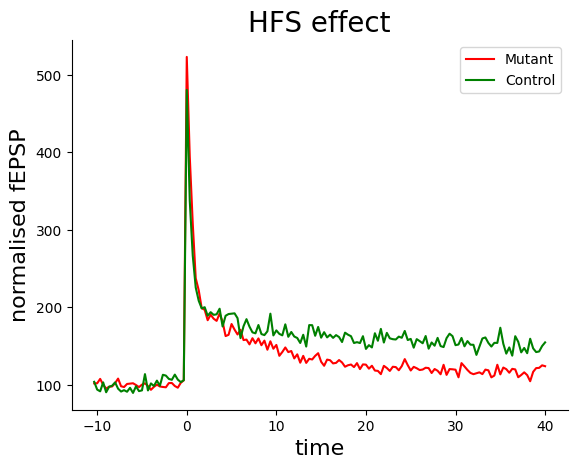

In [30]:
#Create the figure and remove borders on top and right side
fig= plt.figure()
ax=fig.add_subplot()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Plot the data for the two groups in different colors
ax.plot(time, avg_normal_mutant, color='r', label='Mutant')
ax.plot(time, avg_normal_control, color='g', label='Control')
xlabel=ax.set_xlabel("time",fontsize=16)
xlabel=ax.set_ylabel("normalised fEPSP",fontsize=16)
ax.legend()
title=ax.set_title("HFS effect",fontsize=20)

In [ ]:
#@title Click to see solution
#Create the figure and remove borders on top and right side
fig,ax=plt.subplots(figsize=(8,5))
sns.despine(top=True, left=False, bottom=False, right=True)

#Plot the data for the two groups in different colors
ax.scatter(time,Con,s=30,color='k',edgecolor="k",linewidth=0.5)
ax.scatter(time,Mut,s=30,color='red',edgecolor="k",linewidth=0.5)
ax.set_xlim([-10,40]); ax.set_ylim([0,550])
ax.plot([-10,40],[100,100], color="k",linestyle="dashed",alpha=0.7)
ax.arrow(0,60,0,25,width=0.1,color='k',head_width=1,head_length=10)
ax.text(0,35,"HFS",ha='center',fontsize=12,color="k")
ax.set_xlabel('Time (min)',fontsize=20,labelpad=15)
ax.set_ylabel('fEPSP (% of baseline)',fontsize=20, labelpad=15)

---
# Excercise 4: What is the spiking profile of this neuron?

The dataset `neuron.csv` was collected by patch-clamp of a Tonic Spiking neuron receiving input from a photoreceptor. The photoreceptor was stimulated by light-application with a set frequency and the membrane potential of the neuron was measured (measurements taken every ms) for several rounds of stimulation. The columns in the data give the membrane potential of the neuron (column name "Membrane Potential"), a binary value for whether the stimulus was on (1) or off (0) ("Stimulus"), as well as the total input current.<br><br>

###Task 1:
What can you infere about the photoreceptor and neuron from the input current graph and the membrane potential of the neuron?

###Hint:
- Plot the membrane potential, the input current and the stimulus on one graph (the trick here will be to create distinct y axes- `ax.twinx`). What do you see?
<br><br>

###Task 2:
Create the responce profile of the neuron to this specific stimulus.<br>
###Hint:
Determine where the responce loops are located within this raw data array (stimulus on vs off), loop them, and then average them.
<br><br>

###Task 3:
Compute and display spike events  top of the Vm trace if the membrane threshold for a spike event is Vm=-30. Then loop all these spike events, and display then above the responce profile of the neuron, but this time in separate lines.

#Task 1

In [ ]:
#Import the packages you will need
#Import the data
#load data and visualize them


In [ ]:
#@title Click to see solution
#Import the packages you will need
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#@title Click to see solution
from google.colab import files
uploaded = files.upload() #open the dataCon_noheader.csv file

In [ ]:
#@title Click to see solution
#load data and visualize them
data = pd.read_csv('neuron.csv')
data

In [ ]:
#Extract membrane potential, current and stimulus data


#Create a figure for membrane potential, current and stimulus data
#assign a different y axis on the right side of the graph




In [ ]:
#@title Click to see solution
#Extract membrane potential, current and stimulus data
Vm=data['Membrane potential (mV)']
Current=data['Total Current Input (a.u.)']
Stimulus=data['Stimulus']

#membrane potential, current and stimulus data
fig,ax = plt.subplots(figsize = (20,10))
ax2 = ax.twinx() #assign a different y axis on the right side of the graph

ax.plot(Vm, color="#dc322f")
ax2.plot(Current, color="#859900")
ax2.plot(Stimulus*25, color='blue',alpha=0.5)

ax.set_ylabel("Membrane potential (mV)",fontsize=16)
ax.set_xlabel("Time (ms)",fontsize=16)
ax2.set_ylabel("Total Input Current (a.u.)",fontsize=16)

From the input current graph, we can observe that light stimulation is steadily followed by a current burst which steadily decays to a "mid" value while the light remains on, and then returns to 0 when the light is off.

We can therefore conclude that the photoreceptor connected to our neuron is an "On transient excitatory neuron", meaning that it responds to an onset of light, steadily adapts to the light (probably to not reach a saturation point and being able to respond to further increase of light (to be tested)), remains activated while the light is on (giving information about the light status falling onto this particular photoreceptor), and is excitatory as it sends a positive current to the main neuron.

The red Vm curve gives us information about the neuron response profile: In the same example, we can see a typical spiking neuron which display a rapid train of spike upon light activation, then regular spikes while light remains present. Upon light extinction, the Vm returns to its resting state after a short undershoot period.

#TASK 2

In [ ]:
#Create a list of time points marking the beginning of each loop




In [ ]:
#@title Click to see solution
Data_Stimulus = data["Stimulus"]

#Create a list of time points marking the beginning of each loop
stimulus_begin_times = []
# Goes through each timepoint
for x in range(0,len(Data_Stimulus)-1):
    # Checks if the stimulus went from 0 to 1
    if (Data_Stimulus[x] < Data_Stimulus[x + 1]):
         # Make a list of times  when stimulus increased
        stimulus_begin_times.append(x)

print("The simulus starts at these time points: ",  stimulus_begin_times)

In [ ]:
# Compute arraylength for single stimulus:
    # Takes the starting time point for the second stimulus loop
    # And subtracts the time point from the first one, giving the time points length of a full loop


In [ ]:
#@title Click to see solution
# Compute arraylength for single stimulus:
    # Takes the starting time point for the second stimulus loop
    # And subtracts the time point from the first one, giving the time points length of a full loop
loop_duration = stimulus_begin_times[1] - stimulus_begin_times[0]
print("Each stimulus loops is:", loop_duration, "ms")

In [ ]:
# Create looped arrays

# Create a vertical stack

In [ ]:
#@title Click to see solution
# Create looped arrays
Vm_loops = []
InputCurrent_loops = []

# Create a vertical stack
Vm_loops = np.vstack(
            # for each x (stimulus starting point), except the last entry,
            # extract the data from x point to x point + the duration of the loop
            [Vm[x:x + loop_duration] for x in stimulus_begin_times[:-1]])

InputCurrent_loops = np.vstack(
            [Current[x:x + loop_duration] for x in stimulus_begin_times[:-1]])

print(Vm_loops)
print(InputCurrent_loops)

In [ ]:
#Calculate the average of the looped arrays


#Plot both the overlay of all loops and the average with different colours


In [ ]:
#@title Click to see solution
#Calculate the average of the looped arrays
Vm_Average = np.mean(Vm_loops, axis=0)
InputCurrent_Average = np.mean(InputCurrent_loops, axis=0)

#Plot both the overlay of all loops and the average with different colours
fig,ax = plt.subplots(2,1,figsize = (20,20))

for i in range (len(Vm_loops)):
    ax[0].plot(Vm_loops[i], color="grey")
ax[0].plot(Vm_Average, linewidth=5, color="#dc322f")

for i in range (len(InputCurrent_loops)):
    ax[1].plot(InputCurrent_loops[i], color="grey")
ax[1].plot(InputCurrent_Average, linewidth=5, color="#859900")

ax[0].set_ylabel("Membrane potential (mV)",fontsize=16)
ax[1].set_ylabel("Total Input Current (a.u.)",fontsize=16)
ax[1].set_xlabel("Time (ms)",fontsize=16)

#Task 3

In [ ]:
# Determine a membrane threshold for spike event


# Create a timepoint list for each spike event


In [ ]:
#@title Click to see solution
# Determine a membrane threshold for spike event
Vm_threshold = -30
# Create a spike counter variable
spike = 0
# Create a timepoint list for each spike event
spike_points = []
# For each point in the array, exluding the first one. (Because we want to look for change between x and x-1)
for x in range(1, len(Vm) - 1):
    # look for all instances where subsequent Vm points jump from <threshold at x-1 to >threshold at x
    if (Vm[x] > Vm_threshold and Vm[x - 1] < Vm_threshold):
        # Append the spike event time point to the list
        spike_points.append(x)
        # Increase the number of spike event counted by 1
        spike += 1

print(spike, "spike detected")

In [ ]:
# First we will attribute a y value to each spike point, so it can sit on top of the traces


#Plot the spike events on top of the traces


In [ ]:
#@title Click to see solution
# Determine a membrane threshold for spike event
Vm_threshold = -30
# Create a spike counter variable
spike = 0
# Create a timepoint list for each spike event
spike_points = []
# For each point in the array, exluding the first one. (Because we want to look for change between x and x-1)
for x in range(1, len(Vm) - 1):
    # look for all instances where subsequent Vm points jump from <threshold at x-1 to >threshold at x
    if (Vm[x] > Vm_threshold and Vm[x - 1] < Vm_threshold):
        # Append the spike event time point to the list
        spike_points.append(x)
        # Increase the number of spike event counted by 1
        spike += 1

print(spike, "spike detected")

In [ ]:
# Create a looped spike event list

#Plot the looped spike events vertically on top of the average trace



In [ ]:
#@title Click to see solution
# Create a looped spike event list
Spike_loops = []
# Create a x array corresponding to the length of the Vm array
xSpike_loops = np.linspace(0, len(Vm) - 1, len(Vm))
# For each loop and for each spike event:
for i, x in enumerate(stimulus_begin_times[:-1]):
    # Append each spike point to its loop "timing"
    Spike_loops.append(
        [xSpike_loops[sp] - xSpike_loops[x] for sp in spike_points if sp > x and sp < x + loop_duration])

fig = plt.figure(figsize=(20,10))

# For each loop:
for i in range(len(stimulus_begin_times) - 1):
    # Create a y array of length specific to each loop spike event number
    ySpike_loops = np.zeros(len(Spike_loops[i]))
    # For each event in that loop:
    for j in range(len(Spike_loops[i])):
        # Assign a y value increment by 3 to avoid dot merging on display
        ySpike_loops[j] = -10+3*i
    # Plot all spike events
    plt.plot(Spike_loops[i], ySpike_loops, 'o', color="#dc322f")

# Plot the looped Vm average trace as well
plt.plot(Vm_Average, color="#dc322f",linewidth=5)
